# Creating my own functions and comparing their performance times with existing packages created for Python.

To Do:
1. Import numpy and matploylib.
2. Create a function that generates a random square matrix N x N where N is the input value of the function. (And don't use numpy)
3. Do the same of 2. using numpy
4. Use sklearn normalize() on one matrix 5x5, then use standard scaler(). Print the result.
5. Use standard scaler() on the matrix from 4, and after that use normalize(). Print the result and compare with 4.
6. Create a function that calculates the mean of any square matrix of dim N (dont use numpy)
7. Do again 6. using numpy.
8. Now using 2 and 6 generate the mean value of matrices of size 10, 100, 1000, 10000.
9. Same as 8 but using 3 and 7
10. Plot the results of 8 and 9 for comparasion.


In [39]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from time import time
import math

### Generate a random NxN matrix

In [26]:
#function to generate a random square matrix of size 
# range of rng (-100,100)

def generate_sq_m(n):
    #outer list
    lO = list()
    
    #makes sure n is an integer
    n=int(n)
    
    for z in range(n):
        #inner list, creates the rows
        lI = list()
        
        # creates a randomly generated list of n elements
        for i in range(n):
            
            #can change the random function here to include a 
            #different range or produce integers
            
            rgn = random.randint(-100,100)
            lI.append(rgn)
            i = i+1
        
        #add that inner list to the outer list
        lO.append(lI)
        #leave the loop
        
    return lO

In [27]:
#gets a value for the user
print('Generating a random NxN matrix using my own function')
print('Enter a value for N:')
n = input()
n=int(n)

# calling the function
generate_sq_m(n)

Generating a random NxN matrix using my own function
Enter a value for N:
3


[[3, 100, -57], [76, -91, -17], [57, -50, -54]]

### Generating a random NxN matrix using numpy

In [28]:
#Arguments: (low,high,size=(rows,cols))

#gets a value for the user
print('Generating a random NxN matrix using numpy')
print('Enter a value for N:')
n = input()
n=int(n)
    
matrix = np.random.randint(-100,100, size=(n, n))
print(matrix)

Generating a random NxN matrix using numpy
Enter a value for N:
3
[[-45  20 -34]
 [-53 -86  48]
 [ 69 -22  12]]


### Normalize then Scale a 5x5 matrix

In [29]:
m5 = np.random.randint(-100,100, size=(5, 5))
print('5x5 Matrix:')
print(m5)

5x5 Matrix:
[[ 36  42 -65 -19  68]
 [ 57 -27 -83 -25 -25]
 [ 26  56  75  19  75]
 [-54  16  93  -5 -48]
 [ 85 -45  76  27   3]]


In [30]:
#normalising first

#print('Normalised Matrix:')
m5_norm = preprocessing.normalize(m5)
#print(m5_norm)

#scaling second

print('Normed then Scaled Matrix:')
scaler = preprocessing.StandardScaler()
m5_scaled = scaler.fit_transform(m5_norm)
print(m5_scaled)

Normed then Scaled Matrix:
[[ 0.17981589  0.94489058 -1.08796364 -0.90234191  1.17073488]
 [ 0.67544852 -0.97714606 -1.34174643 -1.22182198 -0.83179084]
 [-0.11742909  1.16576787  0.7191966   0.96280295  1.14699969]
 [-1.82243847  0.19183705  0.98919647 -0.1580891  -1.25183392]
 [ 1.08460314 -1.32534945  0.72131701  1.31945004 -0.23410981]]


### Scale then Normalize a 5x5 matrix

In [31]:
#scaling first 

#print('Scaled Matrix:')
scaler = preprocessing.StandardScaler()
m5_scaled = scaler.fit_transform(m5_norm)
##print(m5_scaled)

#normalising second
print('Sacled then Normalised Matrix:')
m5_norm = preprocessing.normalize(m5)
print(m5_norm)

Sacled then Normalised Matrix:
[[ 0.32499765  0.37916392 -0.58680131 -0.17152654  0.61388445]
 [ 0.51781819 -0.2452823  -0.75401596 -0.22711324 -0.22711324]
 [ 0.20935769  0.45092426  0.60391641  0.15299216  0.60391641]
 [-0.45395786  0.13450603  0.78181631 -0.04203314 -0.4035181 ]
 [ 0.67699539 -0.35840933  0.60531353  0.2150456   0.02389396]]


Notice how the two previous matrices are different: scaling and normalization are not commutative

### Function to calculate the mean of a square matrix

In [32]:
def mean_matrix(matrix):
    sum = 0
    n = len(matrix)
    
    for i in range(n):
        for z in range(n):
            sum = sum + matrix[i][z]
    mean = sum/(n*n)
    return mean

In [33]:
m =[[2,3,4],[4,5,6],[7,8,9]]
mean_matrix(m)

5.333333333333333

In [34]:
m =[[1,1,1],[1,1,1],[1,1,1]]
mean_matrix(m)

1.0

### Recording time 

In [50]:
x_sizes = [10,100,1000,10000]
my_time = []
num_time=[]
log_my_time = []
log_num_time=[]

### Calculate the mean of  a square matrix using numpy

In [51]:
mean= np.average(m)
print(mean)

1.0


### Generating matrices using my own functions

In [52]:
# n = 10
ti = time()
m10 = generate_sq_m(10)
mean10 = mean_matrix(m10)
print('Mean value 10x10: ',mean10)
t = time()-ti
my_time.append(t)
if t != 0:
    log_my_time.append(np.log(t))


# n = 100
ti = time()
m100 = generate_sq_m(100)
mean100 = mean_matrix(m100)
print('Mean value 100x100: ',mean100)
t = time()-ti
my_time.append(t)
log_my_time.append(np.log(t))
    
# n = 1000
ti = time()
m1000 = generate_sq_m(1000)
mean1000 = mean_matrix(m1000)
print('Mean value 1000x1000: ',mean1000)
t = time()-ti
my_time.append(t)
log_my_time.append(np.log(t))

# n = 10000
ti = time()
m10000 = generate_sq_m(10000)
mean10000 = mean_matrix(m10000)
print('Mean value 10000x10000: ',mean10000)
t = time()-ti
my_time.append(t)
log_my_time.append(np.log(t))

print('Times taken: ',my_time)
print('Log of times taken: ',log_my_time)


Mean value 10x10:  -3.01
Mean value 100x100:  0.0431
Mean value 1000x1000:  0.055041
Mean value 10000x10000:  0.00226824
Times taken:  [0.0009992122650146484, 0.0189974308013916, 1.7122442722320557, 206.09900856018066]
Log of times taken:  [-6.908543324393725, -3.9634515299382667, 0.5378049499199251, 5.32835667740537]


### Generating matrices using numpy

In [53]:
# n = 10
ti = time()
m10 = np.random.randint(-100,100, size=(10, 10))
mean10 = np.average(m10)
print('Mean value 10x10: ',mean10)
t = time()-ti
num_time.append(t)
if t != 0:
    log_num_time.append(np.log(t))  
    
# n = 100
ti=time()
m100 = np.random.randint(-100,100, size=(100, 100))
mean100 = np.average(m100)
print('Mean value 100x100: ',mean100)
t = time()-ti
num_time.append(t)
log_num_time.append(np.log(t)) 

# n = 1000
ti=time()
m1000 = np.random.randint(-100,100, size=(1000, 1000))
mean1000 = np.average(m1000)
print('Mean value 1000x1000: ',mean1000)
t = time()-ti
num_time.append(t)
log_num_time.append(np.log(t))

# n = 10000
ti =time()
m10000 = np.random.randint(-100,100, size=(10000, 10000))
mean10000 = np.average(m10000)
print('Mean value 10000x10000: ',mean10000)
t = time()-ti
num_time.append(t)
log_num_time.append(np.log(t))  

print('Times taken: ',num_time)
print('Log of times taken: ',log_my_time)


Mean value 10x10:  3.53
Mean value 100x100:  -0.3397
Mean value 1000x1000:  -0.575112
Mean value 10000x10000:  -0.50555527
Times taken:  [0.06835699081420898, 0.00800013542175293, 0.292055606842041, 6.605624675750732]
Log of times taken:  [-6.908543324393725, -3.9634515299382667, 0.5378049499199251, 5.32835667740537]


#### Note how the numpy code worked much faster

### Plotting times of numpy vs my code 

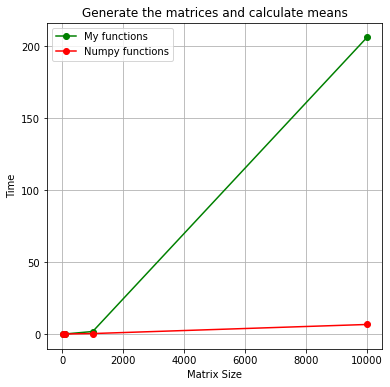

In [64]:
#setting the figure size
plot = plt.figure(figsize=(6,6))

#plotting the two time lists
plt.plot(x_sizes,my_time,'go-',label='My functions')
plt.plot(x_sizes,num_time,'ro-',label='Numpy functions')

plt.legend()

#setting some attributes of the graph
plt.xlabel('Matrix Size')
plt.ylabel('Time')
plt.title('Generate the matrices and calculate means')
plt.grid(True)


#saving the graph

#NOTE: Must save the plot before plt.show() !!!
plt.savefig('timePlot.jpg')

plt.show()


### Plotting log times of numpy versus my code 

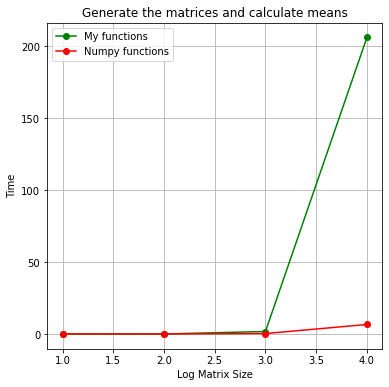

In [63]:
log_x_sizes = [1,2,3,4]

#setting the figure size
plot = plt.figure(figsize=(6,6))

#plotting the two time lists
plt.plot(log_x_sizes,my_time,'go-',label='My functions')
plt.plot(log_x_sizes,num_time,'ro-',label='Numpy functions')

plt.legend()

#setting some attributes of the graph
plt.xlabel('Log Matrix Size')
plt.ylabel('Time')
plt.title('Generate the matrices and calculate means')
plt.grid(True)


#saving the graph

#NOTE: Must save the plot before plt.show() !!!
plt.savefig('logtimePlot.jpg')

plt.show()
